# Tinggi 30

In [1]:
from roboflow import Roboflow
rf = Roboflow(api_key="bSj4K02UdSqagdTEh8Z5")
project = rf.workspace("lulus-vpibo").project("green-coffee-bean-defects")
version = project.version(11)
dataset = version.download("coco-mmdetection")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to green-coffee-bean-defects-11 in coco-mmdetection:: 100%|██████████| 54/54 [00:01<00:00, 45.74it/s]


# Tinggi 40

In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="bSj4K02UdSqagdTEh8Z5")
project = rf.workspace("lulus-vpibo").project("green-coffee-bean-defects")
version = project.version(12)
dataset = version.download("coco-mmdetection")             

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to green-coffee-bean-defects-12 in coco-mmdetection:: 100%|██████████| 54/54 [00:01<00:00, 35.01it/s]


# Tinggi 50

In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="bSj4K02UdSqagdTEh8Z5")
project = rf.workspace("lulus-vpibo").project("green-coffee-bean-defects")
version = project.version(13)
dataset = version.download("coco-mmdetection")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to green-coffee-bean-defects-13 in coco-mmdetection:: 100%|██████████| 54/54 [00:01<00:00, 36.90it/s]


# Cetak grafik mAP

Available scalars in tutorial_exps/training__LSKNet-S_20250113_110754/tf_logs/events.out.tfevents.1736766481.4dd1ef83e882.1051.3: ['train/loss_rpn_cls', 'train/loss_rpn_bbox', 'train/loss_cls', 'train/acc', 'train/loss_bbox', 'train/loss', 'train/grad_norm', 'learning_rate', 'momentum', 'val/mAP']


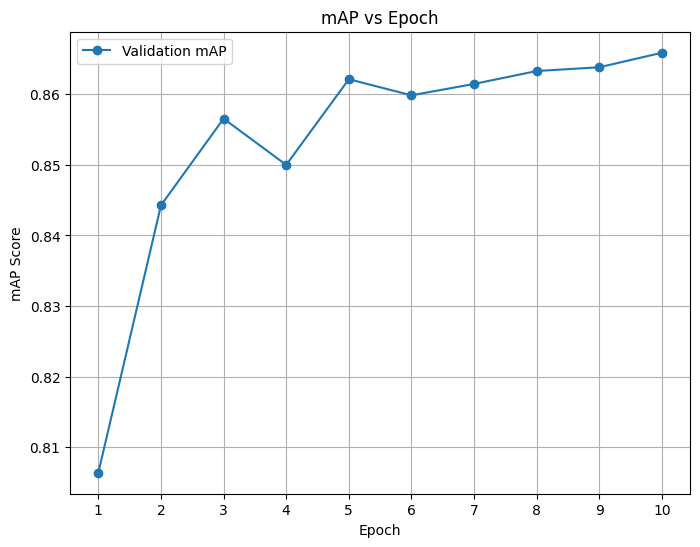

In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

# Path ke folder TensorBoard logs
log_dir = "tutorial_exps/training__LSKNet-S_20250113_110754"  # Sesuaikan path Anda

# Cari file event TensorBoard
event_files = []
for root, dirs, files in os.walk(log_dir):
    for file in files:
        if "events.out.tfevents" in file:
            event_files.append(os.path.join(root, file))

# Ambil data dari event file
data = []
for file in event_files:
    event_acc = EventAccumulator(file)
    event_acc.Reload()  # Load data

    # Tampilkan semua scalar yang tersedia
    print(f"Available scalars in {file}: {event_acc.Tags()['scalars']}")

    # Ambil data mAP dari "val/mAP"
    if "val/mAP" in event_acc.Tags()["scalars"]:
        for event in event_acc.Scalars("val/mAP"):
            data.append((event.step, event.value))

# Konversi ke DataFrame
df = pd.DataFrame(data, columns=["Step", "mAP"])
df = df.sort_values(by="Step")

# Normalisasi step menjadi epoch
max_epochs = 10  # Sesuaikan dengan jumlah total epoch pada training
df["Epoch"] = (df["Step"] / df["Step"].max()) * max_epochs

# Plot mAP vs Epoch
plt.figure(figsize=(8, 6))
plt.plot(df["Epoch"], df["mAP"], marker="o", linestyle="-", label="Validation mAP")
plt.xlabel("Epoch")
plt.ylabel("mAP Score")
plt.title("mAP vs Epoch")
plt.xticks(range(1, max_epochs + 1))  # Pastikan hanya menampilkan epoch yang valid
plt.legend()
plt.grid(True)
plt.show()

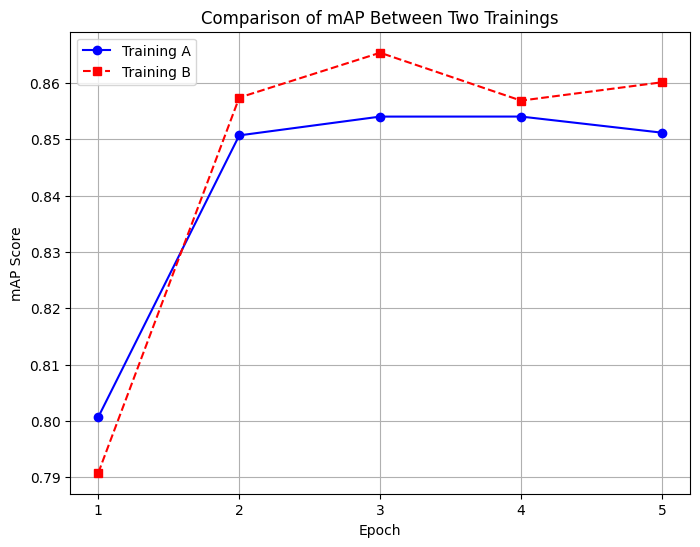

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

# Path ke dua folder TensorBoard logs
log_dirs = {
    "Training A": "tutorial_exps/training__LSKNet-S_20250113_104813/tf_logs",  # Sesuaikan dengan path log pertama
    "Training B": "tutorial_exps/training__LSKNet-S_20250113_101934/tf_logs"   # Sesuaikan dengan path log kedua
}

# Maksimum epoch (sesuaikan dengan jumlah epoch dari training)
max_epochs = 5

# Fungsi untuk membaca TensorBoard log
def extract_map(log_dir):
    event_files = []
    for root, dirs, files in os.walk(log_dir):
        for file in files:
            if "events.out.tfevents" in file:
                event_files.append(os.path.join(root, file))

    data = []
    for file in event_files:
        event_acc = EventAccumulator(file)
        event_acc.Reload()  # Load data

        # Pastikan "val/mAP" ada di scalars
        if "val/mAP" in event_acc.Tags()["scalars"]:
            for event in event_acc.Scalars("val/mAP"):
                data.append((event.step, event.value))

    df = pd.DataFrame(data, columns=["Step", "mAP"])
    df = df.sort_values(by="Step")

    # Normalisasi step menjadi epoch
    df["Epoch"] = (df["Step"] / df["Step"].max()) * max_epochs
    return df

# Membaca data dari kedua training
df_a = extract_map(log_dirs["Training A"])
df_b = extract_map(log_dirs["Training B"])

# Plot kedua mAP
plt.figure(figsize=(8, 6))
plt.plot(df_a["Epoch"], df_a["mAP"], marker="o", linestyle="-", label="Training A", color="blue")
plt.plot(df_b["Epoch"], df_b["mAP"], marker="s", linestyle="--", label="Training B", color="red")

plt.xlabel("Epoch")
plt.ylabel("mAP Score")
plt.title("Comparison of mAP Between Two Trainings")
plt.xticks(range(1, max_epochs + 1))  # Pastikan hanya menampilkan epoch yang valid
plt.legend()
plt.grid(True)
plt.show()